<a href="https://colab.research.google.com/github/mrikele/Projeto-EP/blob/main/Projeto1EP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

#Lendo dataset
a = pd.read_csv('ebola_2014_2016_clean.csv')
#Eliminando células vazias
a = a.dropna()
a

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0
...,...,...,...,...
2480,Liberia,2016-03-23,10666.0,4806.0
2481,Italy,2016-03-23,1.0,0.0
2482,Liberia,2016-03-23,5.0,4.0
2483,Nigeria,2016-03-23,20.0,8.0


In [ ]:
#Visão geral dos dados
a.describe()

,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
count,2477.000000,2477.000000
mean,2553.678644,1031.659265
std,4427.118148,1657.710028
min,0.000000,0.000000
25%,1.000000,0.000000
50%,8.000000,6.000000
75%,3657.000000,2387.000000
max,14122.000000,4806.000000


In [ ]:
#filtrando numero cumulativo de casos confirmados, prováveis e suspeitos
suspect = a['Cumulative no. of confirmed, probable and suspected cases'].tolist()
suspect

[648.0,
 19.0,
 1026.0,
 1378.0,
 1261.0,
 22.0,
 1871.0,
 812.0,
 1.0,
 3.0,
 862.0,
 1361.0,
 2046.0,
 21.0,
 861.0,
 1424.0,
 21.0,
 2081.0,
 3.0,
 1.0,
 1620.0,
 936.0,
 21.0,
 2407.0,
 21.0,
 942.0,
 1673.0,
 2710.0,
 1.0,
 20.0,
 1813.0,
 3022.0,
 1.0,
 1008.0,
 3280.0,
 1022.0,
 20.0,
 1.0,
 1940.0,
 2021.0,
 3458.0,
 1.0,
 1074.0,
 20.0,
 1157.0,
 1.0,
 20.0,
 2304.0,
 3696.0,
 1.0,
 20.0,
 1199.0,
 3834.0,
 2437.0,
 1.0,
 20.0,
 1.0,
 1.0,
 1298.0,
 2789.0,
 3924.0,
 1.0,
 1.0,
 4076.0,
 20.0,
 1.0,
 1350.0,
 2950.0,
 2.0,
 1.0,
 20.0,
 4249.0,
 1.0,
 1472.0,
 3252.0,
 1519.0,
 20.0,
 1.0,
 1.0,
 3.0,
 4262.0,
 3410.0,
 20.0,
 1.0,
 3.0,
 3706.0,
 1.0,
 4665.0,
 1540.0,
 1.0,
 4.0,
 3896.0,
 1.0,
 1.0,
 20.0,
 1553.0,
 4665.0,
 6535.0,
 1.0,
 20.0,
 1.0,
 1.0,
 1906.0,
 4.0,
 5235.0,
 1667.0,
 20.0,
 1.0,
 4.0,
 1.0,
 1.0,
 6535.0,
 5338.0,
 1.0,
 4.0,
 1731.0,
 6525.0,
 1.0,
 20.0,
 1.0,
 4759.0,
 20.0,
 1760.0,
 4.0,
 1.0,
 6619.0,
 1.0,
 1.0,
 4862.0,
 1.0,
 4.0,
 4.0,
 20.

In [ ]:
#definindo numero de classes
classes = 5

In [ ]:
#Encontrando amplitude
maior = max(suspect)
menor = min(suspect)
amp_geral = maior-menor
amp_classe = round(amp_geral/classes)

print(maior)
print(menor)
print(amp_geral)
print(amp_classe)

14122.0
0.0
14122.0
2824


In [ ]:
#Encontrando limites de classe
limites_inf = [menor]
for i in range(classes):
  limites_inf.append(limites_inf[i]+amp_classe)
limites_inf

[0.0, 2824.0, 5648.0, 8472.0, 11296.0, 14120.0]

In [ ]:
#contando ocorrências
frequencias = {'classe1':0,'classe2':0,'classe3':0,'classe4':0,'classe5':0}
for numero in suspect:
  if numero < limites_inf[1]:
    frequencias['classe1'] +=1
  elif numero < limites_inf[2]:
    frequencias['classe2'] +=1
  elif numero < limites_inf[3]:
    frequencias['classe3'] +=1
  elif numero < limites_inf[4]:
    frequencias['classe4'] +=1
  else:
    frequencias['classe5'] +=1
frequencias

{'classe1': 1766,
 'classe2': 233,
 'classe3': 41,
 'classe4': 252,
 'classe5': 185}

In [ ]:
#Frequencia relativa
ocorrencias = len(suspect)
for classe in frequencias:
  frequencias[classe] = frequencias[classe]/ocorrencias
  
frequencias

{'classe1': 0.7129592248687929,
 'classe2': 0.09406540169559952,
 'classe3': 0.016552280985062576,
 'classe4': 0.10173597093257973,
 'classe5': 0.07468712151796528}

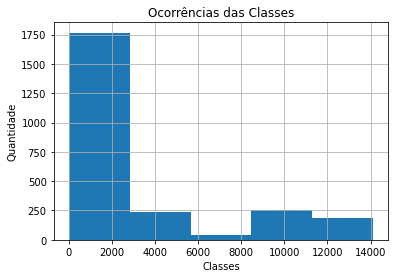

In [ ]:
#histograma de frequencia
import matplotlib.pyplot as plt

plt.hist(suspect,5)
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [ ]:
#media
import numpy as np

media = np.mean(suspect)
media

2553.6786435203876

In [ ]:
#mediana
ordenar = sorted(suspect)
suspect
mediana = np.median(ordenar)
mediana

8.0

In [ ]:
#moda
contagens = [0]*len(suspect)
#contagens

In [ ]:
#contando ocorrências
for i in range(len(ordenar)):
  contagens[i] = suspect.count(ordenar[i])
#contagens

In [ ]:
max(contagens)

859

In [ ]:
indices_moda = np.where(np.array(contagens) == max(contagens))
for indice in indices_moda[0]:
  print(ordenar[indice])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
from scipy import stats
stats.mode(suspect)

ModeResult(mode=array([1.]), count=array([859]))

In [ ]:
#variancia
var = np.var(suspect)
var

19591462.553169254

In [ ]:
#desvio padrão
desv = np.std(suspect)
desv

4426.224412879362

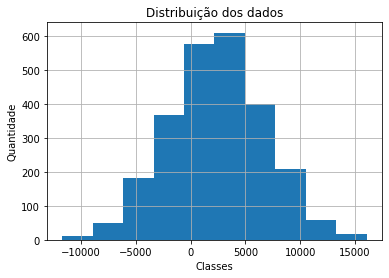

In [ ]:

dados = np.random.normal(media,desv,len(suspect))
dados

plt.hist(dados,10)
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Distribuição dos dados')
plt.grid(True)
plt.show()

In [ ]:
#intervalo de confiança
#calculando estatísticas da fórmula

x = a['Cumulative no. of confirmed, probable and suspected cases'].mean()
std = a['Cumulative no. of confirmed, probable and suspected cases'].std()
n = len(a)
print('media: ', x, 'desvio padrao: ', std, 'ocorrencias: ', n)


media:  2553.6786435203876 desvio padrao:  4427.118148257048 ocorrencias:  2477


In [ ]:
#Consultar valor z

alfa = 0.05 #probabilidade de erro
z = st.norm.ppf(1-alfa/2)
z

1.959963984540054

In [ ]:
#Aplicar fórmula

lim_superior = x + z*std/np.sqrt(n)
lim_inferior = x - z*std/np.sqrt(n)

ic = pd.DataFrame([lim_inferior, x, lim_superior]).round(1)
ic




,0
0,2379.3
1,2553.7
2,2728.0
